In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import scipy as stats
from scipy.stats import chi2

# calculateMahalanobis Function to calculate
# the Mahalanobis distance
def calculateMahalanobis(y=None, data=None, cov=None):
    y_mu = y - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(y_mu, inv_covmat)
    mahal = np.dot(left, y_mu.T)
    return mahal.diagonal()

In [2]:
#Cargo datos
datos= pd.read_csv('./data/AMD_clustering_0.csv',delimiter=',',header=0) 
print(datos.shape)
print(datos.head(5))
datos.dropna()

#Normalizo datos
datos=(datos-datos.min())/(datos.max()-datos.min())
print(datos.head(5))

#Selecciono un porcentaje
datos=datos.sample(frac=0.005,random_state=1234)
print(datos.shape)

# Creating a new column in the dataframe that holds
# the Mahalanobis distance for each row
#Calculo distancia mahalanobis
datos['Mahalanobis'] = calculateMahalanobis(y=datos, data=datos)

# calculate p-value for each mahalanobis distance
datos['p'] = 1 - chi2.cdf(datos['Mahalanobis'], 3)

# display first five rows of dataframe
datos.head(5)

(3820518, 5)
        SS        ST        CH        ML        fC
0  0.83550  0.467500  0.004328  0.034988  0.291824
1  0.82925  0.443889  0.004874  0.036527  0.289788
2  0.83225  0.445000  0.003185  0.037753  0.295944
3  0.82075  0.434722  0.003215  0.041143  0.287854
4  0.82125  0.436944  0.003215  0.041143  0.288577
         SS        ST        CH        ML        fC
0  0.845693  0.475528  0.004260  0.035094  0.281209
1  0.839327  0.451509  0.004813  0.036638  0.279142
2  0.842383  0.452639  0.003104  0.037867  0.285394
3  0.830668  0.442183  0.003134  0.041268  0.277177
4  0.831177  0.444444  0.003134  0.041268  0.277912
(19103, 5)


,SS,ST,CH,ML,fC,Mahalanobis,p
1266732,0.943794,0.690573,0.001209,0.006795,0.383354,4.210572,0.239606
2720381,0.890516,0.484571,0.002794,0.031946,0.308777,0.462398,0.927071
3135068,0.888886,0.529332,0.004298,0.028975,0.305380,0.277519,0.964199
762183,0.897418,0.880157,0.000359,0.030271,0.315257,1.862027,0.601531
183561,0.856593,0.066378,0.004283,0.020829,0.254934,5.497656,0.138779


In [3]:
print(datos.shape)
sinoutliers = datos[datos['p'] > 0.001]  
print(sinoutliers.shape)
print(sinoutliers.head())

(19103, 7)
(18342, 7)
               SS        ST        CH        ML        fC  Mahalanobis  \
1266732  0.943794  0.690573  0.001209  0.006795  0.383354     4.210572   
2720381  0.890516  0.484571  0.002794  0.031946  0.308777     0.462398   
3135068  0.888886  0.529332  0.004298  0.028975  0.305380     0.277519   
762183   0.897418  0.880157  0.000359  0.030271  0.315257     1.862027   
183561   0.856593  0.066378  0.004283  0.020829  0.254934     5.497656   

                p  
1266732  0.239606  
2720381  0.927071  
3135068  0.964199  
762183   0.601531  
183561   0.138779  


In [4]:

del sinoutliers['Mahalanobis']
del sinoutliers['p']

               SS        ST        CH        ML        fC  SOM
1266732  0.943794  0.690573  0.001209  0.006795  0.383354    2
2720381  0.890516  0.484571  0.002794  0.031946  0.308777    0
3135068  0.888886  0.529332  0.004298  0.028975  0.305380    0
762183   0.897418  0.880157  0.000359  0.030271  0.315257    2
183561   0.856593  0.066378  0.004283  0.020829  0.254934    1


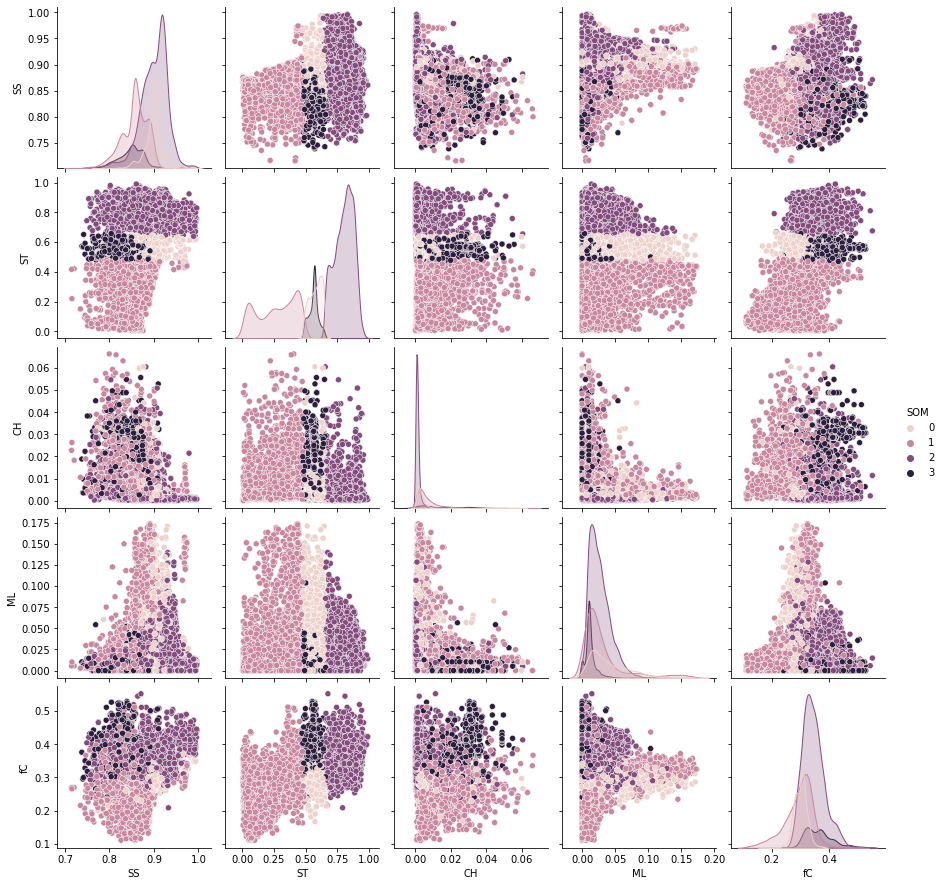

In [6]:
!pip install sklearn_som
from sklearn_som.som import SOM
import seaborn as sb

salida=sinoutliers.copy()

modelo = SOM(m=2,n=2, dim=len(sinoutliers.columns))
salida['SOM']=modelo.fit_predict(salida.to_numpy())
print(salida.head())
sb.pairplot(salida,hue='SOM')

In [7]:
!pip install psycopg2-binary

     |████████████████████████████████| 3.0 MB 1.8 MB/s            


In [8]:
import psycopg2

In [9]:
conn_str = "host='172.17.0.1' dbname='p7_AMD' port=5432 user='postgres' password='postgres'"
print ("Conectando a la BD\n->%s" % (conn_str))
# Conectamos y si no se puede realizar, lanzamos una excepción
conn = psycopg2.connect(conn_str)
# conn.cursor devuelve un objeto cursor que usaremos para realizar las consultas
cursor = conn.cursor()
print ("Connectados!\n")

Conectando a la BD
->host='172.17.0.1' dbname='p7_AMD' port=5432 user='postgres' password='postgres'
Connectados!



In [10]:
import pandas as pd
datos2=pd.read_sql("SELECT * FROM indicators",con=conn)
conn.close()

In [11]:
datos2.isna().sum()
datos2.head()

,time,time_code,country_name,country_code,adolescent_fertility_rate,life_exp_birth,mortality_rate_neonatal,gdp_per_capita,co2_emissions,current_health_exp_per_capita,electric_pow_consum,out_of_pocket_expend_per_capita,adjusted_net_national_incom_per_capita
0,2000,YR2000,Afghanistan,AFG,153.9510,55.841,60.9,NaN,0.036574,NaN,NaN,NaN,NaN
1,2000,YR2000,Albania,ALB,19.0372,73.955,12.1,1126.683340,1.026213,275.797180,1449.647413,166.587886,1037.505398
2,2000,YR2000,Algeria,DZA,11.7556,70.640,21.1,1765.027146,2.578744,294.703308,683.294806,76.017284,1280.127582
3,2000,YR2000,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,YR2000,Andorra,AND,NaN,NaN,3.8,21854.246803,7.952286,1936.802124,NaN,300.538084,NaN


In [12]:
print(datos2.shape)
datos2=datos2.dropna()
print(datos2.shape)
#Normalizo datos
print(datos2.head(5))
datos2['adolescent_fertility_rate']=(datos2['adolescent_fertility_rate']-datos2['adolescent_fertility_rate'].min())/(datos2['adolescent_fertility_rate'].max()-datos2['adolescent_fertility_rate'].min())
datos2['life_exp_birth']=(datos2['life_exp_birth']-datos2['life_exp_birth'].min())/(datos2['life_exp_birth'].max()-datos2['life_exp_birth'].min())
datos2['mortality_rate_neonatal']=(datos2['mortality_rate_neonatal']-datos2['mortality_rate_neonatal'].min())/(datos2['mortality_rate_neonatal'].max()-datos2['mortality_rate_neonatal'].min())
datos2['gdp_per_capita']=(datos2['gdp_per_capita']-datos2['gdp_per_capita'].min())/(datos2['gdp_per_capita'].max()-datos2['gdp_per_capita'].min())
datos2['co2_emissions']=(datos2['co2_emissions']-datos2['co2_emissions'].min())/(datos2['co2_emissions'].max()-datos2['co2_emissions'].min())
datos2['current_health_exp_per_capita']=(datos2['current_health_exp_per_capita']-datos2['current_health_exp_per_capita'].min())/(datos2['current_health_exp_per_capita'].max()-datos2['current_health_exp_per_capita'].min())
datos2['electric_pow_consum']=(datos2['electric_pow_consum']-datos2['electric_pow_consum'].min())/(datos2['electric_pow_consum'].max()-datos2['electric_pow_consum'].min())
datos2['out_of_pocket_expend_per_capita']=(datos2['out_of_pocket_expend_per_capita']-datos2['out_of_pocket_expend_per_capita'].min())/(datos2['out_of_pocket_expend_per_capita'].max()-datos2['out_of_pocket_expend_per_capita'].min())
datos2['adjusted_net_national_incom_per_capita']=(datos2['adjusted_net_national_incom_per_capita']-datos2['adjusted_net_national_incom_per_capita'].min())/(datos2['adjusted_net_national_incom_per_capita'].max()-datos2['adjusted_net_national_incom_per_capita'].min())

print(datos2.head(5))

# Creating a new column in the dataframe that holds
# the Mahalanobis distance for each row
#Calculo distancia mahalanobis
#datos2['Mahalanobis'] = calculateMahalanobis(y=datos2, data=datos2)

# calculate p-value for each mahalanobis distance
#datos2['p'] = 1 - chi2.cdf(datos2['Mahalanobis'], 3)

# display first five rows of dataframe
#datos2.head(5)

(434, 13)
(257, 13)
   time time_code country_name country_code  adolescent_fertility_rate  \
1  2000    YR2000      Albania          ALB                    19.0372   
2  2000    YR2000      Algeria          DZA                    11.7556   
5  2000    YR2000       Angola          AGO                   196.6992   
7  2000    YR2000    Argentina          ARG                    66.3552   
8  2000    YR2000      Armenia          ARM                    39.3926   

   life_exp_birth  mortality_rate_neonatal  gdp_per_capita  co2_emissions  \
1          73.955                     12.1     1126.683340       1.026213   
2          70.640                     21.1     1765.027146       2.578744   
5          46.522                     50.3      556.836182       0.988077   
7          73.576                     11.0     7708.099115       3.587392   
8          71.409                     16.1      622.740923       1.159761   

   current_health_exp_per_capita  electric_pow_consum  \
1              

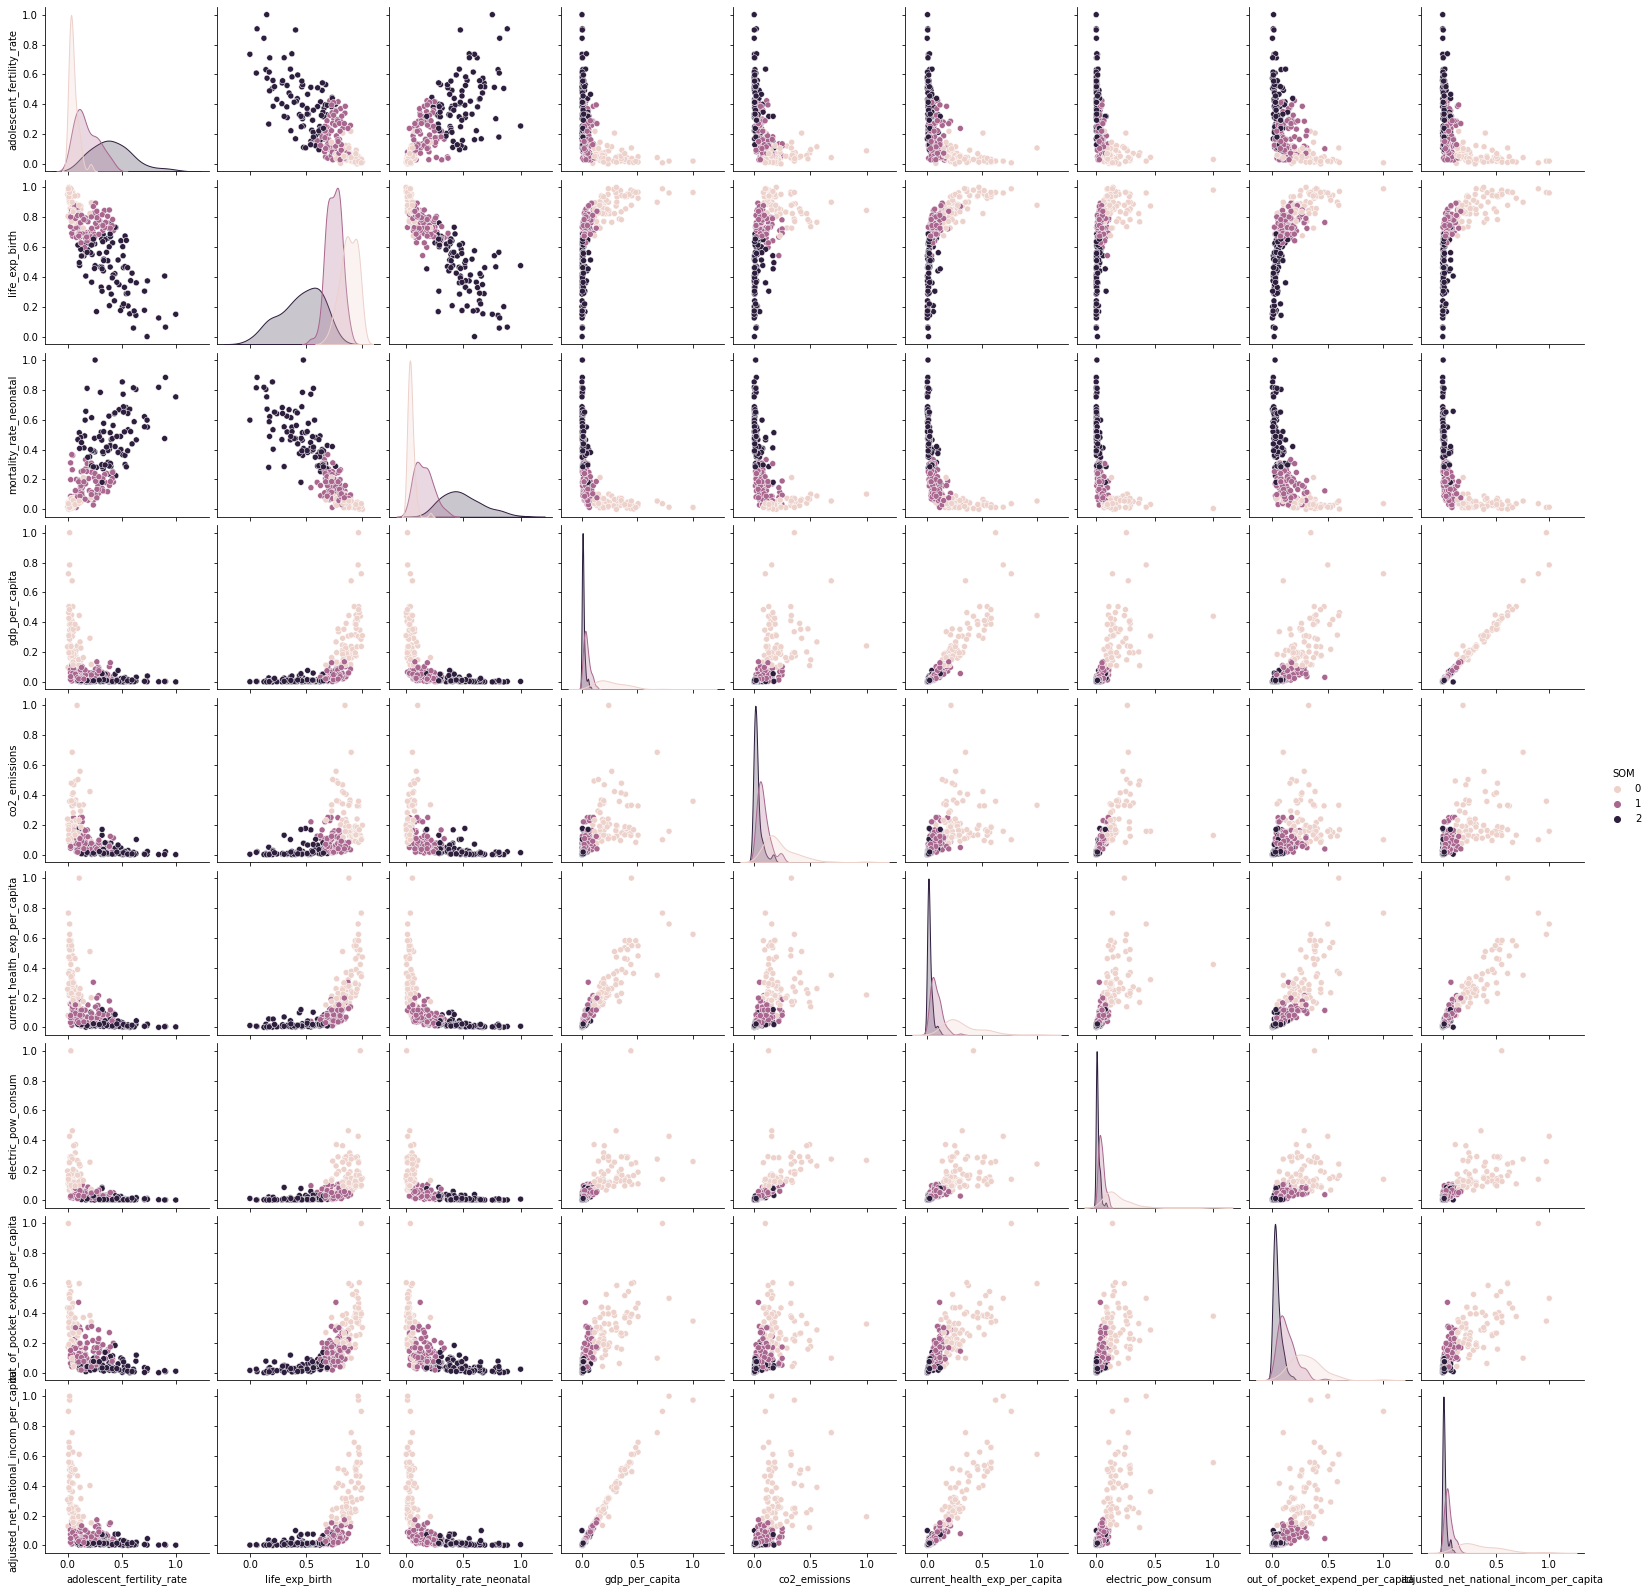

In [13]:
!pip install sklearn_som
from sklearn_som.som import SOM
import seaborn as sb

salida=datos2.copy()

modelo = SOM(m=3, n=1, dim=len(salida.columns))
salida['SOM']=modelo.fit_predict(salida.to_numpy())
sb.pairplot(salida,hue='SOM')